In [4]:
import pandas as pd
houses = pd.read_csv("data/kc_house_data.csv")
titanic = pd.read_csv("data/titanic.csv")
nf = pd.read_csv("data/netflix_titles.csv", sep = "|", index_col = 0)

In [45]:
houses.head(1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.0,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650


In [5]:
titanic.head(1)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"


In [9]:
type(titanic.name)

pandas.core.series.Series

In [10]:
titanic.home.dest #will not work because it looks for a property for home which is NA , here we will have to use brackets
titanic["home.dest"]

AttributeError: 'DataFrame' object has no attribute 'home'

In [11]:
## another reason why square braces would be useful is dot notation may not be able to read variables

mystery = "price"
houses.mystery ##this will not work

AttributeError: 'DataFrame' object has no attribute 'mystery'

In [12]:
houses[mystery] ## this will work

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [13]:
names = titanic.name
type(names)

pandas.core.series.Series

<h3> Series is a one D ndarray with axis labels or each value has a corresponding index </h3>

In [16]:
type(houses.mean(numeric_only= True))

pandas.core.series.Series

In [19]:
houses.price.sum()
houses.price.min()
houses.price.max()

7700000.0

In [21]:
houses.price.shape

(21613,)

In [22]:
houses.index

RangeIndex(start=0, stop=21613, step=1)

In [23]:
houses.price.index

RangeIndex(start=0, stop=21613, step=1)

In [25]:
houses.min().index ## here the index is not the self assigned index by pandas but rather the different columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

<h3> Important series methods </h3>

- head
- tail
- describe
- unique
- nunique
- nlargest
- nsmallest
- value_counts
- plot

In [26]:
titanic.age.head(1) #will return a series

0    29
Name: age, dtype: object

In [27]:
titanic.age.describe()

count     1309
unique      99
top          ?
freq       263
Name: age, dtype: object

In [28]:
houses.price.describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [29]:
nf.rating.describe()

count      8803
unique       17
top       TV-MA
freq       3207
Name: rating, dtype: object

In [30]:
nf.release_year.describe()

count    8807.000000
mean     2014.180198
std         8.819312
min      1925.000000
25%      2013.000000
50%      2017.000000
75%      2019.000000
max      2021.000000
Name: release_year, dtype: float64

In [33]:
##unique only a series method will give all he unique values ina particular series

houses.bedrooms.unique()

array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10, 33])

In [36]:
houses.bedrooms.nunique() ## will give the count of unique values of bedrooms in the series

##by default nuinque does not count NaN or missing values

13

In [39]:
print(nf.rating.unique()) ## this will give NaN values

print(nf.rating.nunique()) ## this will not give NaN values
print(nf.rating.nunique(dropna= False)) ## this will give NaN values as well

['PG-13' 'TV-MA' 'PG' 'TV-14' 'TV-PG' 'TV-Y' 'TV-Y7' 'R' 'TV-G' 'G'
 'NC-17' '74 min' '84 min' '66 min' 'NR' nan 'TV-Y7-FV' 'UR']
17
18


In [42]:
houses.price.nlargest(9) ## by default gives 5 values

7252    7700000.0
3914    7062500.0
9254    6885000.0
4411    5570000.0
1448    5350000.0
1315    5300000.0
1164    5110800.0
8092    4668000.0
2626    4500000.0
Name: price, dtype: float64

In [44]:
titanic.pclass.nlargest(5  ,keep = "all") ## keep = "all" will keep all the values which are duplicates but large

600     3
601     3
602     3
603     3
604     3
       ..
1304    3
1305    3
1306    3
1307    3
1308    3
Name: pclass, Length: 709, dtype: int64

In [46]:
## can also work on dataframes

houses.nlargest(10, ["price", "bathrooms"]) ## 10 is no of rows we want and ["price"] is the column for highest values
## outcome will dedupe for bathrooms, if two houses have same price then one with higeher bathroom will be given priority

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3914,9808700762,20140611T000000,7062500.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9254,9208900037,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4411,2470100110,20140804T000000,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1448,8907500070,20150413T000000,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1315,7558700030,20150413T000000,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1164,1247600105,20141020T000000,5110800.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8092,1924059029,20140617T000000,4668000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2626,7738500731,20140815T000000,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8638,3835500195,20140618T000000,4489000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [47]:
houses.nsmallest(10, ["price"])

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1149,3421079032,20150217T000000,75000.0,1,0.00,670,43377,1.0,0,0,...,3,670,0,1966,0,98022,47.2638,-121.906,1160,42882
15293,40000362,20140506T000000,78000.0,2,1.00,780,16344,1.0,0,0,...,5,780,0,1942,0,98168,47.4739,-122.280,1700,10387
465,8658300340,20140523T000000,80000.0,1,0.75,430,5050,1.0,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500
16198,3028200080,20150324T000000,81000.0,2,1.00,730,9975,1.0,0,0,...,5,730,0,1943,0,98168,47.4808,-122.315,860,9000
8274,3883800011,20141105T000000,82000.0,3,1.00,860,10426,1.0,0,0,...,6,860,0,1954,0,98146,47.4987,-122.341,1140,11250
2141,1623049041,20140508T000000,82500.0,2,1.00,520,22334,1.0,0,0,...,5,520,0,1951,0,98168,47.4799,-122.296,1572,10570
18468,7999600180,20140529T000000,83000.0,2,1.00,900,8580,1.0,0,0,...,5,900,0,1918,0,98168,47.4727,-122.270,2060,6533
3767,1523049188,20150430T000000,84000.0,2,1.00,700,20130,1.0,0,0,...,6,700,0,1949,0,98168,47.4752,-122.271,1490,18630
10253,2422049104,20140915T000000,85000.0,2,1.00,830,9000,1.0,0,0,...,6,830,0,1939,0,98032,47.3813,-122.243,1160,7680
16714,1322049150,20150305T000000,85000.0,2,1.00,910,9753,1.0,0,0,...,5,910,0,1947,0,98032,47.3897,-122.236,1160,7405


<h3> Selecting multiple columns </h3>

In [49]:
## pass multiple columns in  alist
nf[["title", "rating"]].describe()

,title,rating
count,8807,8803
unique,8807,17
top,Dick Johnson Is Dead,TV-MA
freq,1,3207


<h3> value_counts method </h3>

In [50]:
## returns a series with count of unique values

In [51]:
houses.bedrooms.value_counts()

bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: count, dtype: int64

In [52]:
titanic.sex.value_counts()

sex
male      843
female    466
Name: count, dtype: int64

In [53]:
houses.floors.value_counts()

floors
1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: count, dtype: int64

In [54]:
## can be used on df as well
houses.value_counts() ## will return how count of each unique rows


id          date             price     bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode  lat      long      sqft_living15  sqft_lot15
1000102     20140916T000000  280000.0  6         3.00       2400         9373      2.0     0           0     3          7      2400        0              1991      0             98002    47.3262  -122.214  2060           7316          1
6324000090  20150511T000000  210000.0  2         1.00       990          8140      1.0     0           0     1          6      990         0              1910      0             98116    47.5828  -122.382  2150           5000          1
6329000380  20140619T000000  319950.0  2         1.00       920          8341      1.0     0           0     3          7      920         0              1939      0             98146    47.5015  -122.380  2330           9792          1
6329000190  20140729T000000  750000.0  4         1.75    

In [57]:
houses[["bedrooms", "bathrooms"]].value_counts() ## will give the value count of each combination of bed and bath
##Output is always a series

bedrooms  bathrooms
4         2.50         2502
3         2.50         2357
          1.75         1870
          1.00         1780
2         1.00         1558
                       ... 
7         1.00            1
          3.25            1
          5.50            1
          5.75            1
33        1.75            1
Name: count, Length: 144, dtype: int64

<h3> Plotting a graph</h3>

<Axes: >

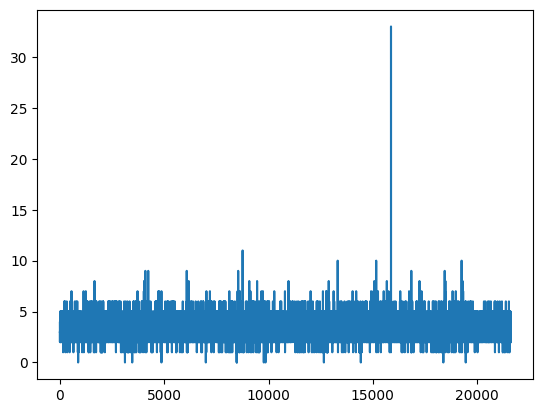

In [59]:
houses.bedrooms.plot() ## will always plot a line plot

<Axes: xlabel='bedrooms'>

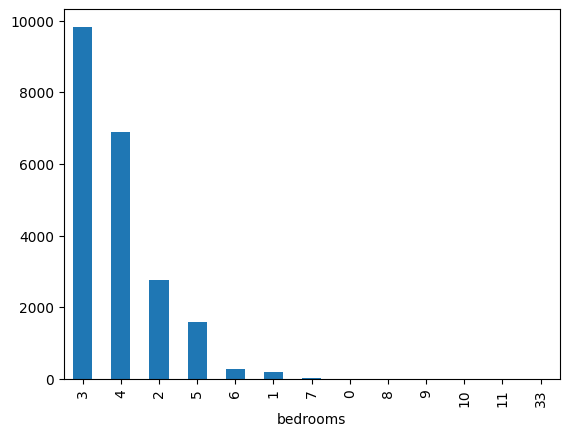

In [62]:
houses.bedrooms.value_counts().plot(kind = "bar")

<Axes: ylabel='count'>

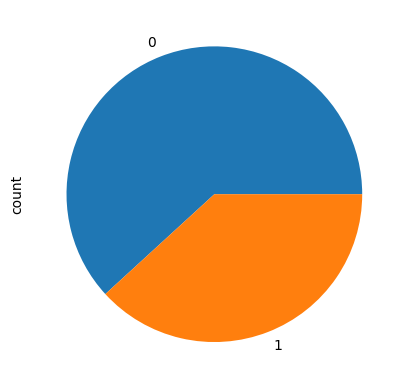

In [63]:
titanic.survived.value_counts().plot(kind = "pie")

<Axes: >

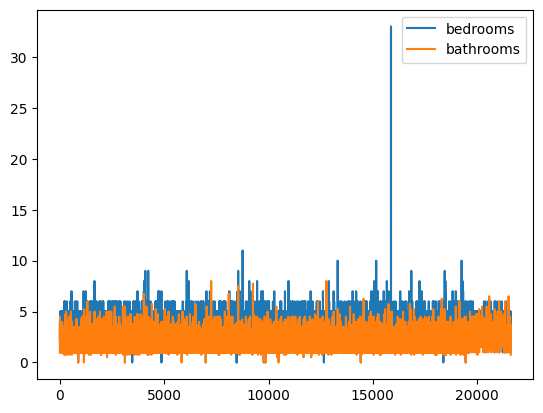

In [64]:
## also works on df

houses[["bedrooms", "bathrooms"]].plot()

<Axes: xlabel='bedrooms', ylabel='bathrooms'>

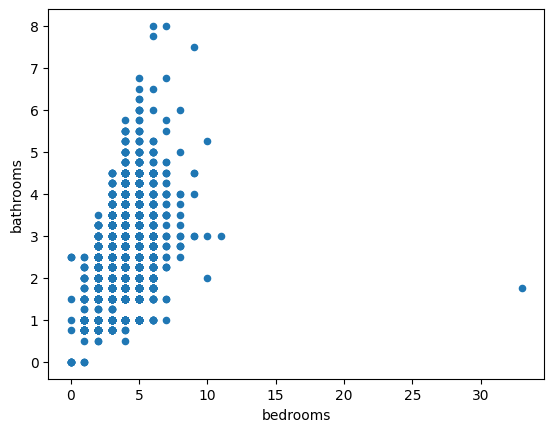

In [67]:

houses[["bedrooms", "bathrooms"]].plot(x = "bedrooms", y = "bathrooms", kind = "scatter")

<Axes: xlabel='rating'>

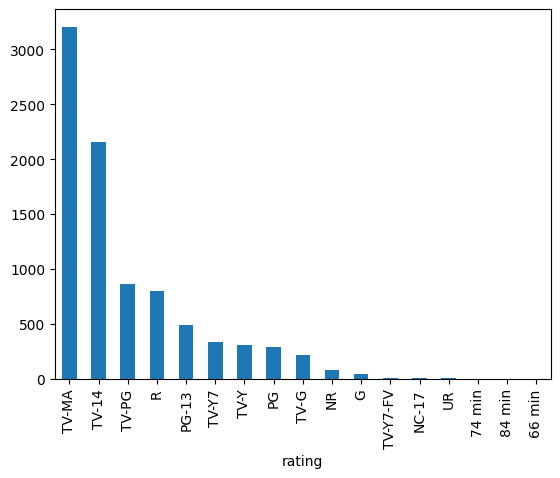

In [69]:
nf.rating.value_counts().plot(kind = "bar")